In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load datasets
veltri_train = pd.read_csv('veltri_train.csv')
veltri_val = pd.read_csv('veltri_val.csv')
veltri_test = pd.read_csv('veltri_test.csv')

lmpred_train = pd.read_csv('lmpred_train.csv')
lmpred_val = pd.read_csv('lmpred_val.csv')
lmpred_test = pd.read_csv('lmpred_test.csv')

In [2]:
# 1. Dataset sizes
print("=== VELTRI DATASET ===")
print(f"Train: {len(veltri_train)} samples")
print(f"Val: {len(veltri_val)} samples")
print(f"Test: {len(veltri_test)} samples")
print(f"Total: {len(veltri_train) + len(veltri_val) + len(veltri_test)}")

print("\n=== LMPRED DATASET ===")
print(f"Train: {len(lmpred_train)} samples")
print(f"Val: {len(lmpred_val)} samples")
print(f"Test: {len(lmpred_test)} samples")
print(f"Total: {len(lmpred_train) + len(lmpred_val) + len(lmpred_test)}")

=== VELTRI DATASET ===
Train: 1424 samples
Val: 708 samples
Test: 1424 samples
Total: 3556

=== LMPRED DATASET ===
Train: 3005 samples
Val: 1504 samples
Test: 3007 samples
Total: 7516


In [3]:
# 2. Class balance
print("\n=== CLASS DISTRIBUTION ===")
print("Veltri Train:", veltri_train['label'].value_counts().to_dict())
print("LMPred Train:", lmpred_train['label'].value_counts().to_dict())


=== CLASS DISTRIBUTION ===
Veltri Train: {0: 712, 1: 712}
LMPred Train: {1: 1503, 0: 1502}


In [4]:
# 3. Sequence length distribution
veltri_train['length'] = veltri_train['sequence'].str.len()
lmpred_train['length'] = lmpred_train['sequence'].str.len()

print("\n=== SEQUENCE LENGTH STATISTICS ===")
print("Veltri - Mean:", veltri_train['length'].mean())
print("Veltri - Min:", veltri_train['length'].min())
print("Veltri - Max:", veltri_train['length'].max())

print("\nLMPred - Mean:", lmpred_train['length'].mean())
print("LMPred - Min:", lmpred_train['length'].min())
print("LMPred - Max:", lmpred_train['length'].max())


=== SEQUENCE LENGTH STATISTICS ===
Veltri - Mean: 34.42696629213483
Veltri - Min: 11
Veltri - Max: 158

LMPred - Mean: 43.927454242928455
LMPred - Min: 11
LMPred - Max: 255


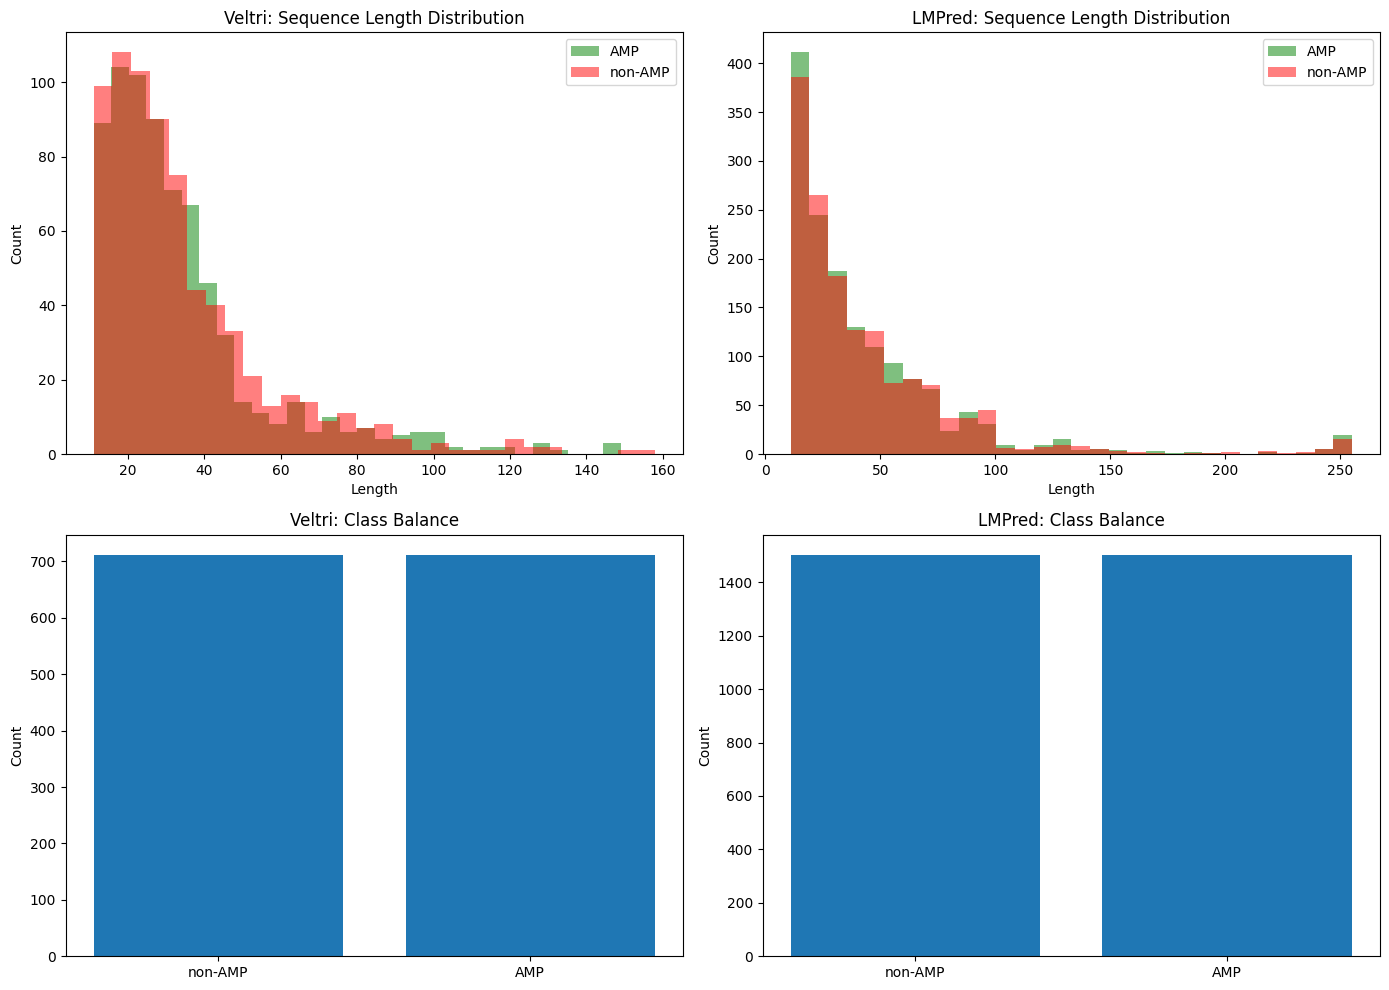

In [5]:
# 4. Visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Length distribution - Veltri
axes[0, 0].hist(veltri_train[veltri_train['label']==1]['length'],
                bins=30, alpha=0.5, label='AMP', color='green')
axes[0, 0].hist(veltri_train[veltri_train['label']==0]['length'],
                bins=30, alpha=0.5, label='non-AMP', color='red')
axes[0, 0].set_title('Veltri: Sequence Length Distribution')
axes[0, 0].set_xlabel('Length')
axes[0, 0].set_ylabel('Count')
axes[0, 0].legend()

# Length distribution - LMPred
axes[0, 1].hist(lmpred_train[lmpred_train['label']==1]['length'],
                bins=30, alpha=0.5, label='AMP', color='green')
axes[0, 1].hist(lmpred_train[lmpred_train['label']==0]['length'],
                bins=30, alpha=0.5, label='non-AMP', color='red')
axes[0, 1].set_title('LMPred: Sequence Length Distribution')
axes[0, 1].set_xlabel('Length')
axes[0, 1].set_ylabel('Count')
axes[0, 1].legend()

# Class balance - Veltri
axes[1, 0].bar(['non-AMP', 'AMP'], veltri_train['label'].value_counts().sort_index())
axes[1, 0].set_title('Veltri: Class Balance')
axes[1, 0].set_ylabel('Count')

# Class balance - LMPred
axes[1, 1].bar(['non-AMP', 'AMP'], lmpred_train['label'].value_counts().sort_index())
axes[1, 1].set_title('LMPred: Class Balance')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [6]:
# 5. Sample sequences
print("\n=== SAMPLE SEQUENCES ===")
print("Veltri AMP example:")
print(veltri_train[veltri_train['label']==1]['sequence'].iloc[0])
print("\nVeltri non-AMP example:")
print(veltri_train[veltri_train['label']==0]['sequence'].iloc[0])


=== SAMPLE SEQUENCES ===
Veltri AMP example:
GLFTLIKGAAKLIGKTVPKKQARLGMNLWLVKLPTNVKT

Veltri non-AMP example:
QNVMGRGIALPGMANPQMFQRASTDLEEETADVHAEPEQNPQVSKAPQRARGPRGKRLPKAIKE


# Incorporating Molecular Properties


In [ ]:
# Amino acid properties
# Source: Kyte-Doolittle hydrophobicity scale & standard biochemistry
AA_PROPERTIES = {
    'A': {'hydrophobicity': 1.8, 'charge': 0, 'polar': False, 'aromatic': False},
    'R': {'hydrophobicity': -4.5, 'charge': 1, 'polar': True, 'aromatic': False},
    'N': {'hydrophobicity': -3.5, 'charge': 0, 'polar': True, 'aromatic': False},
    'D': {'hydrophobicity': -3.5, 'charge': -1, 'polar': True, 'aromatic': False},
    'C': {'hydrophobicity': 2.5, 'charge': 0, 'polar': False, 'aromatic': False},
    'Q': {'hydrophobicity': -3.5, 'charge': 0, 'polar': True, 'aromatic': False},
    'E': {'hydrophobicity': -3.5, 'charge': -1, 'polar': True, 'aromatic': False},
    'G': {'hydrophobicity': -0.4, 'charge': 0, 'polar': False, 'aromatic': False},
    'H': {'hydrophobicity': -3.2, 'charge': 0.5, 'polar': True, 'aromatic': True},
    'I': {'hydrophobicity': 4.5, 'charge': 0, 'polar': False, 'aromatic': False},
    'L': {'hydrophobicity': 3.8, 'charge': 0, 'polar': False, 'aromatic': False},
    'K': {'hydrophobicity': -3.9, 'charge': 1, 'polar': True, 'aromatic': False},
    'M': {'hydrophobicity': 1.9, 'charge': 0, 'polar': False, 'aromatic': False},
    'F': {'hydrophobicity': 2.8, 'charge': 0, 'polar': False, 'aromatic': True},
    'P': {'hydrophobicity': -1.6, 'charge': 0, 'polar': False, 'aromatic': False},
    'S': {'hydrophobicity': -0.8, 'charge': 0, 'polar': True, 'aromatic': False},
    'T': {'hydrophobicity': -0.7, 'charge': 0, 'polar': True, 'aromatic': False},
    'W': {'hydrophobicity': -0.9, 'charge': 0, 'polar': False, 'aromatic': True},
    'Y': {'hydrophobicity': -1.3, 'charge': 0, 'polar': True, 'aromatic': True},
    'V': {'hydrophobicity': 4.2, 'charge': 0, 'polar': False, 'aromatic': False},
}

In [3]:
def calculate_sequence_properties(sequence):
    """Calculate physicochemical properties of a peptide sequence"""
    valid_aas = [aa for aa in sequence if aa in AA_PROPERTIES]

    if len(valid_aas) == 0:
        return {
            'hydrophobicity': 0,
            'net_charge': 0,
            'hydrophobic_ratio': 0,
            'polar_ratio': 0,
            'aromatic_ratio': 0,
            'positive_ratio': 0,
            'negative_ratio': 0
        }

    # Average hydrophobicity
    hydrophobicity = np.mean([AA_PROPERTIES[aa]['hydrophobicity'] for aa in valid_aas])

    # Net charge
    net_charge = sum([AA_PROPERTIES[aa]['charge'] for aa in valid_aas])

    # Composition ratios
    hydrophobic_count = sum([1 for aa in valid_aas if AA_PROPERTIES[aa]['hydrophobicity'] > 0])
    polar_count = sum([1 for aa in valid_aas if AA_PROPERTIES[aa]['polar']])
    aromatic_count = sum([1 for aa in valid_aas if AA_PROPERTIES[aa]['aromatic']])
    positive_count = sum([1 for aa in valid_aas if AA_PROPERTIES[aa]['charge'] > 0])
    negative_count = sum([1 for aa in valid_aas if AA_PROPERTIES[aa]['charge'] < 0])

    return {
        'hydrophobicity': hydrophobicity,
        'net_charge': net_charge,
        'hydrophobic_ratio': hydrophobic_count / len(valid_aas),
        'polar_ratio': polar_count / len(valid_aas),
        'aromatic_ratio': aromatic_count / len(valid_aas),
        'positive_ratio': positive_count / len(valid_aas),
        'negative_ratio': negative_count / len(valid_aas),
    }

In [4]:
# Apply to datasets
def add_physicochemical_features(df):
    """Add physicochemical properties to dataframe"""
    props = df['sequence'].apply(calculate_sequence_properties)
    props_df = pd.DataFrame(props.tolist())
    return pd.concat([df, props_df], axis=1)

# Add properties to datasets
veltri_train_props = add_physicochemical_features(veltri_train)
lmpred_train_props = add_physicochemical_features(lmpred_train)

In [5]:
# Analysis: Compare AMP vs non-AMP
print("=== VELTRI: AMP vs non-AMP Properties ===")
print("\nAMPs:")
print(veltri_train_props[veltri_train_props['label']==1][
    ['hydrophobicity', 'net_charge', 'hydrophobic_ratio', 'positive_ratio']
].describe())

print("\nnon-AMPs:")
print(veltri_train_props[veltri_train_props['label']==0][
    ['hydrophobicity', 'net_charge', 'hydrophobic_ratio', 'positive_ratio']
].describe())

=== VELTRI: AMP vs non-AMP Properties ===

AMPs:
       hydrophobicity  net_charge  hydrophobic_ratio  positive_ratio
count      712.000000  712.000000         712.000000      712.000000
mean         0.129806    3.822331           0.432632        0.179591
std          0.836428    3.279368           0.129009        0.088806
min         -3.000000  -10.500000           0.000000        0.000000
25%         -0.488728    2.000000           0.340909        0.120604
50%          0.094666    3.250000           0.424450        0.166667
75%          0.784611    5.500000           0.523810        0.225202
max          2.106667   22.000000           0.714286        0.583333

non-AMPs:
       hydrophobicity  net_charge  hydrophobic_ratio  positive_ratio
count      712.000000  712.000000         712.000000      712.000000
mean        -0.372211   -0.105337           0.365795        0.141790
std          0.670879    3.283509           0.104548        0.074481
min         -2.985714  -12.500000          

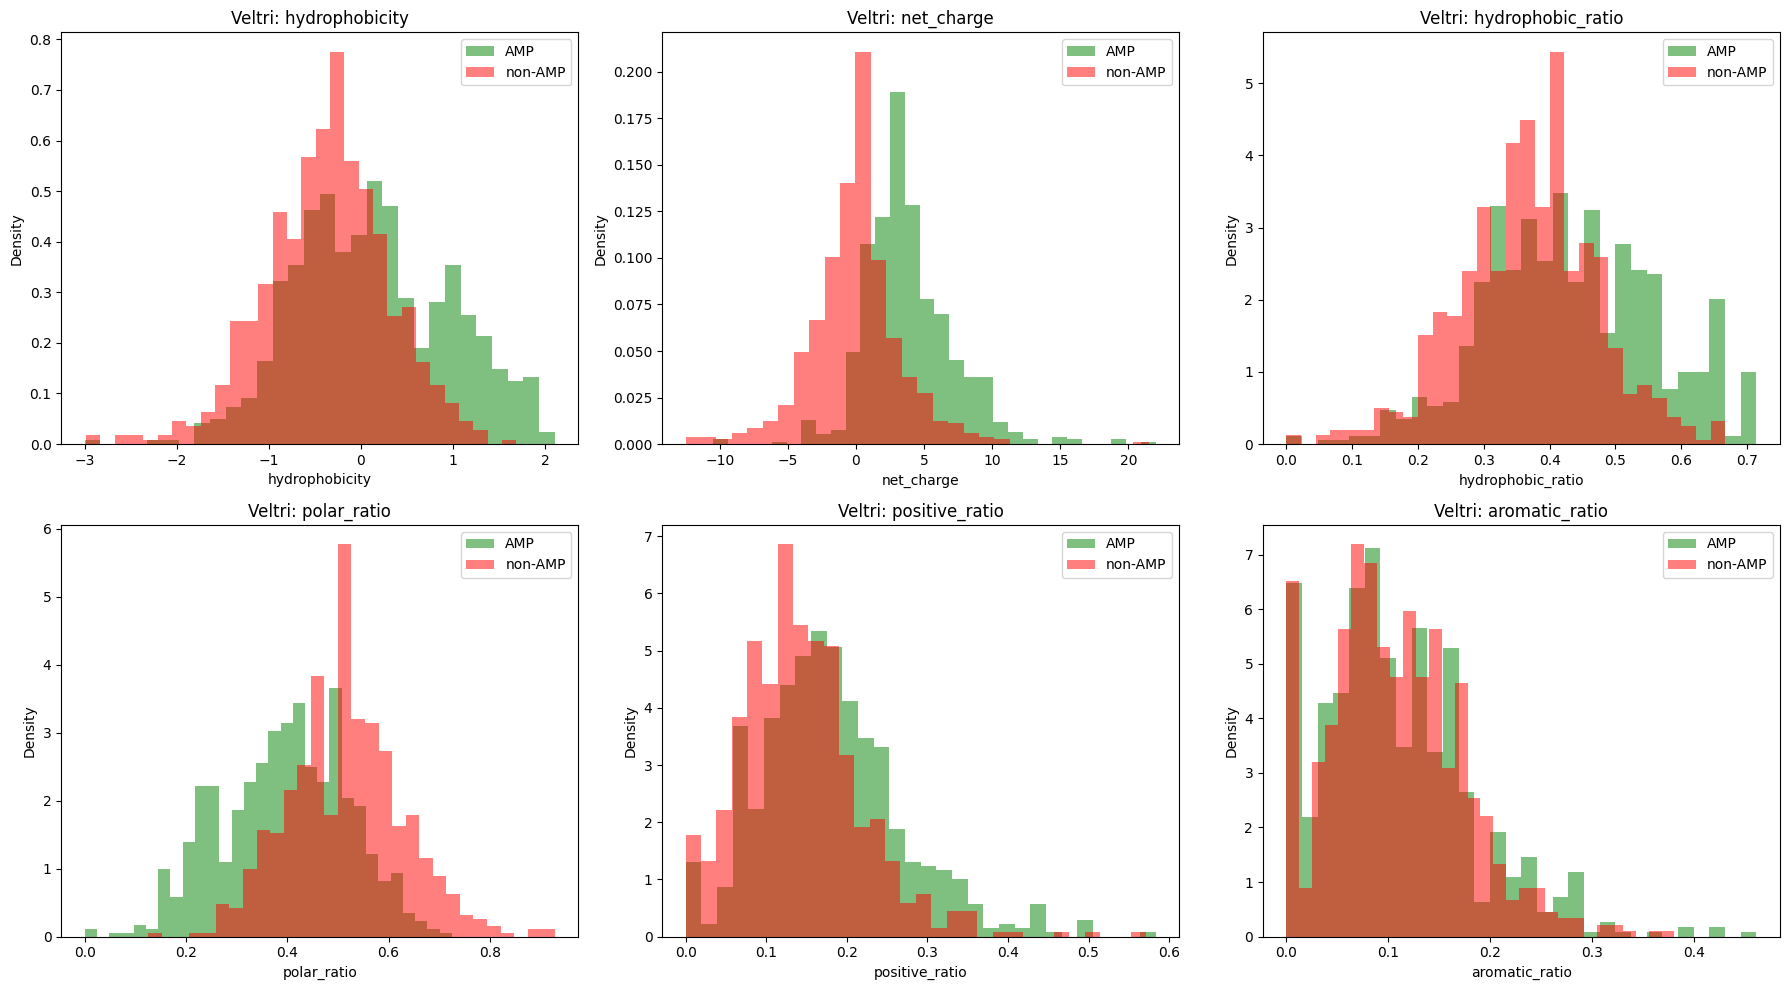

In [6]:
# Visualization: Key properties comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

properties = ['hydrophobicity', 'net_charge', 'hydrophobic_ratio',
              'polar_ratio', 'positive_ratio', 'aromatic_ratio']

for idx, prop in enumerate(properties):
    row = idx // 3
    col = idx % 3

    # Veltri dataset
    amp_data = veltri_train_props[veltri_train_props['label']==1][prop]
    non_amp_data = veltri_train_props[veltri_train_props['label']==0][prop]

    axes[row, col].hist(amp_data, bins=30, alpha=0.5, label='AMP', color='green', density=True)
    axes[row, col].hist(non_amp_data, bins=30, alpha=0.5, label='non-AMP', color='red', density=True)
    axes[row, col].set_title(f'Veltri: {prop}')
    axes[row, col].set_xlabel(prop)
    axes[row, col].set_ylabel('Density')
    axes[row, col].legend()

plt.tight_layout()
plt.savefig('physicochemical_properties.png', dpi=300, bbox_inches='tight')
plt.show()


=== STATISTICAL SIGNIFICANCE (t-test) ===
hydrophobicity      : p=4.6531e-34 ***
net_charge          : p=9.3420e-97 ***
hydrophobic_ratio   : p=6.3114e-26 ***
polar_ratio         : p=3.3001e-72 ***
positive_ratio      : p=8.8380e-18 ***
aromatic_ratio      : p=8.0593e-01 ns

=== Property Correlations ===


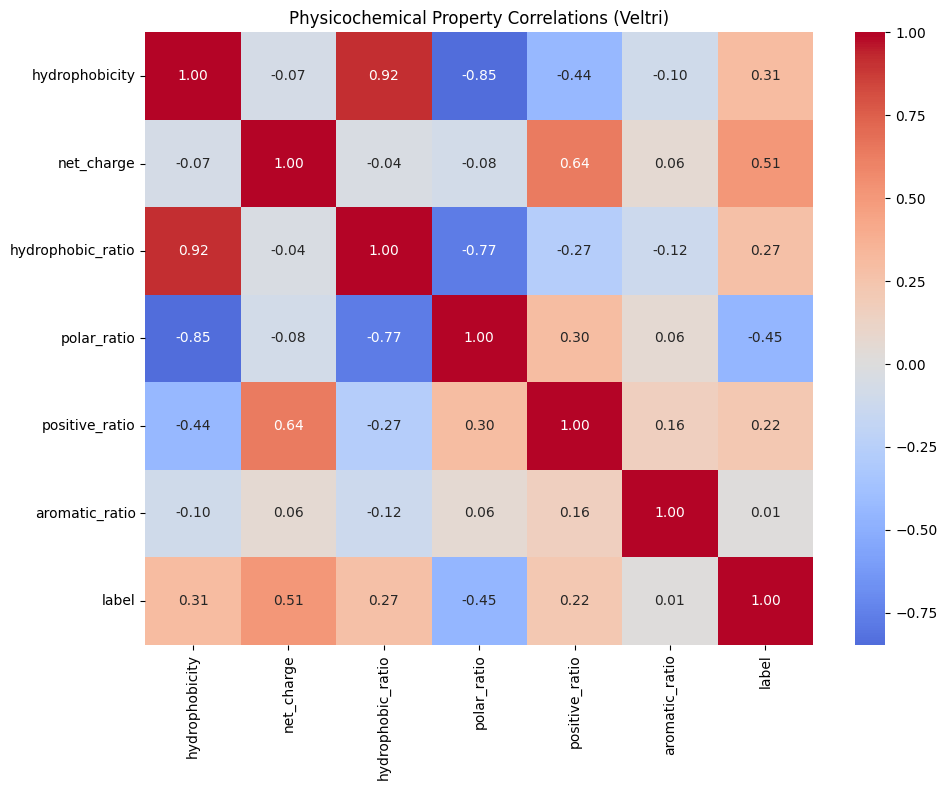

In [7]:
# Statistical comparison
from scipy.stats import ttest_ind

print("\n=== STATISTICAL SIGNIFICANCE (t-test) ===")
for prop in properties:
    amp = veltri_train_props[veltri_train_props['label']==1][prop]
    non_amp = veltri_train_props[veltri_train_props['label']==0][prop]

    t_stat, p_value = ttest_ind(amp, non_amp)
    significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"

    print(f"{prop:20s}: p={p_value:.4e} {significance}")

# Correlation heatmap
print("\n=== Property Correlations ===")
corr = veltri_train_props[properties + ['label']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Physicochemical Property Correlations (Veltri)')
plt.tight_layout()
plt.savefig('property_correlations.png', dpi=300, bbox_inches='tight')
plt.show()